Ron's notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create dataframe of dataset
df = pd.read_csv("Dataset/employfund_data_datesplit.zip", compression="zip", header=0)
df.rename(columns = {'AGE_GROUP':'Age group', 'UE_GROUP':'Unemployment Length group', 'EDUCATION_LEVEL_DESC' : 'Education Level'}, inplace = True)
df

,DATA_AS_AT,TRANSACTION_ID,EXPENDITURE,STATE,JSKR_LINKAGE_KEY,STREAM_PLACEMENT_DESC,EF_CATEGORY_DESCRIPTION,DERIVED_DATE_OF_SERVICE,ACTIVITY_TYPE_DESC,ACTIVITY_SUB_DESC,...,HOMELESS,PWD,CALD,REFUGEE,EX_OFFENDER,Age group,Unemployment Length group,YEAR,MONTH,DAY
0,2018-08-05,303887J,150.0,QLD,1,Stream A,Professional Services,2016-01-04,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,50 to 54 years,Under 12 Months,2016,1,4
1,2018-08-05,283232J,300.0,QLD,1,Stream A,Professional Services,2015-12-21,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,50 to 54 years,Under 12 Months,2015,12,21
2,2018-08-05,412011J,150.0,QLD,1,Stream A,Professional Services,2016-01-11,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,50 to 54 years,Under 12 Months,2016,1,11
3,2018-08-05,376042J,150.0,QLD,1,Stream A,Professional Services,2016-02-08,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,50 to 54 years,Under 12 Months,2016,2,8
4,2018-08-05,415778J,225.0,VIC,2,Stream C,Professional Services,2016-02-18,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,25 to 29 years,24 to 59 Months,2016,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234400,2018-08-05,1297015J,125.4,NSW,912599,Stream A,Professional Services,2016-11-29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,55 to 59 years,Under 12 Months,2016,11,29
1234401,2018-08-05,1239780J,125.4,NSW,912599,Stream A,Professional Services,2016-11-15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,55 to 59 years,Under 12 Months,2016,11,15
1234402,2018-08-05,1360007J,125.4,NSW,912599,Stream A,Professional Services,2016-12-13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,55 to 59 years,Under 12 Months,2016,12,13
1234403,2018-08-05,278868J,44.9,SA,912603,Stream A,Work Related Items,2015-10-29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30 to 39 years,12 to 23 Months,2015,10,29


In [3]:
#df.to_csv("Dataset/jobseekerclean.csv")

Here we trying to find the number of jobseekers for each education level. This will give us a better idea of whether certain types of education levels make up the majority of the dataset, and provides answers to whether education level can assist with unemployment (based on the assumption that higher the education level means less likely to be unemployed).

Higher education is defined (personally) as having a Bachelor or Diploma, or degree or qualification that gives an individual the necessary skills for employment in their relevant industry. 
Lower education is defined as everything up to year 12/13, or vocational education that does not provide an individual with the necessary skills for employment in a relevant industry.
Please note: There are a few other education levels included such as Ed Quals, Tafe, Trades qualifications, but due to either the very negligible number of jobseekers who have actually done these qualifications or for the sake of simplicity, I’ve decided to overlook these in this current analysis.

In [4]:
# Find number of jobseekers for each education level
education_groups_totals = df.groupby("Education Level")["TRANSACTION_ID"].nunique()
education_groups_totals

Education Level
Bachelor Degree or equivalent                  45884
Degree                                            42
Did not go to school                           12881
Diploma                                           46
Diploma or equivalent                          58007
Ed Quals-Associate Diploma                         1
Ed Quals-Degree                                   12
Ed Quals-Job seeker did not go to school           2
Ed Quals-Less than Year 10                        92
Ed Quals-Not volunteered                           5
Ed Quals-Post Graduate                             3
Ed Quals-Primary School Comp                       7
Ed Quals-Secondary Schooling Completed            49
Ed Quals-Trade/TAFE qualification                 51
Ed Quals-Year 10 Completed                       127
Ed Quals-Year 11 Completed                        32
Graduate Certificate or equivalent              6878
Graduate Diploma or equivalent                  1886
Non-trade vocational education

The above dataframe shows the number of jobseekers for each education level present in the dataset. We can see that the highest number of jobseekers have a highest education level of Year 10/11. This is a significant number compared to higher level education categories such as Bachelor Degree or equivalent, or Diploma or equivalent.

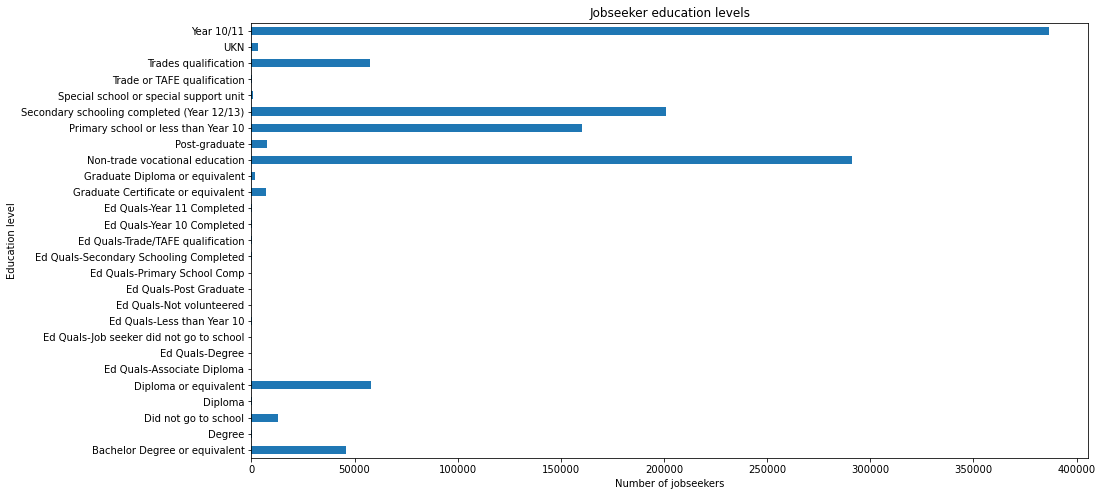

In [12]:
# Plot these results
education_groups_totals.plot(kind="barh")
plt.title("Jobseeker education levels")
plt.xlabel("Number of jobseekers")
plt.ylabel("Education level")
plt.rcParams["figure.figsize"] = [15, 8]
# Run twice to scale the plot

Plotting the above data using a horizontal bar chart.

Here we are trying to find the education level and unemployment length group to see the length of unemployment for each individual from each education level.

In [6]:
# Find education level and unemployment length group
education_unemploymentlength_df = df[["Education Level", "Unemployment Length group"]]
education_unemploymentlength_df

,Education Level,Unemployment Length group
0,Bachelor Degree or equivalent,Under 12 Months
1,Bachelor Degree or equivalent,Under 12 Months
2,Bachelor Degree or equivalent,Under 12 Months
3,Bachelor Degree or equivalent,Under 12 Months
4,Diploma or equivalent,24 to 59 Months
...,...,...
1234400,Non-trade vocational education,Under 12 Months
1234401,Non-trade vocational education,Under 12 Months
1234402,Non-trade vocational education,Under 12 Months
1234403,Year 10/11,12 to 23 Months


In [7]:
# Show data
unemploymentlengthperdegree = df.groupby("Education Level")["Unemployment Length group"].value_counts()
pd.set_option('display.max_rows', None)
unemploymentlengthperdegree_df = pd.DataFrame(unemploymentlengthperdegree)
unemploymentlengthperdegree_df.rename(columns={ unemploymentlengthperdegree_df.columns[0]: "No. of jobseekers" }, inplace = True)
unemploymentlengthperdegree_df

No. of jobseekers
Education Level                            Unemployment Length group                   
Bachelor Degree or equivalent              Under 12 Months                        17784
                                           24 to 59 Months                        12909
                                           12 to 23 Months                         9990
                                           60+ Months                              5201
Degree                                     Under 12 Months                           20
                                           60+ Months                                14
                                           24 to 59 Months                            6
                                           12 to 23 Months                            2
Did not go to school                       24 to 59 Months                         5057
                                           Under 12 Months                         2938
                                           12 to 23 Months                         2841
                                           60+ Months                              2045
Diploma                                    60+ Months                                36
                                           24 to 59 Months                            5
                                           Under 12 Months                            4
                                           12 to 23 Months                            1
Diploma or equivalent                      Under 12 Months                        20579
                                           24 to 59 Months                        16259
                                           12 to 23 Months                        12840
                                           60+ Months                              8329
Ed Quals-Associate Diploma                 Under 12 Months                            1
Ed Quals-Degree                            24 to 59 Months                            6
                                           Under 12 Months                            3
                                           12 to 23 Months                            2
                                           60+ Months                                 1
Ed Quals-Job seeker did not go to school   24 to 59 Months                            2
Ed Quals-Less than Year 10                 24 to 59 Months                           47
                                           60+ Months                                17
                                           12 to 23 Months                           14
                                           Under 12 Months                           14
Ed Quals-Not volunteered                   12 to 23 Months                            4
                                           Under 12 Months                            1
Ed Quals-Post Graduate                     Under 12 Months                            3
Ed Quals-Primary School Comp               24 to 59 Months                            7
Ed Quals-Secondary Schooling Completed     24 to 59 Months                           20
                                           12 to 23 Months                           12
                                           Under 12 Months                           12
                                           60+ Months                                 5
Ed Quals-Trade/TAFE qualification          60+ Months                                24
                                           24 to 59 Months                           13
                                           Under 12 Months                           13
                                           12 to 23 Months                            1
Ed Quals-Year 10 Completed                 Under 12 Months                           59
                                           24 to 59 Months                           36
                      

From this dataframe we can see that generally speeking, those with a higher education are less likely to be unemployed for longer amounts of time compared to those with a lower education level. From looking at Bachelor Degree or equivalent and Diploma or equivalent compared with Year 10/11 and primary school or less than year 10, we can that this is the case.

Here we look at the number of jobseekers for each age group to find out if there is a significant number of Jobseekers from a certain age group(s).

In [8]:
# Finding number of jobseekers in each age group
age_groups = df.groupby("Age group")["TRANSACTION_ID"].nunique()
age_groups

Age group
22 to 24 years    120396
25 to 29 years    158935
30 to 39 years    285346
40 to 49 years    286385
50 to 54 years    107278
55 to 59 years     66194
60+ years          37285
Under 22 years    172481
Name: TRANSACTION_ID, dtype: int64

We can see that the age groups of 30 to 39 and 40 to 49 consist of the majority of the dataset. Could this be because of their education level?

Text(0, 0.5, 'Number of jobseekers')

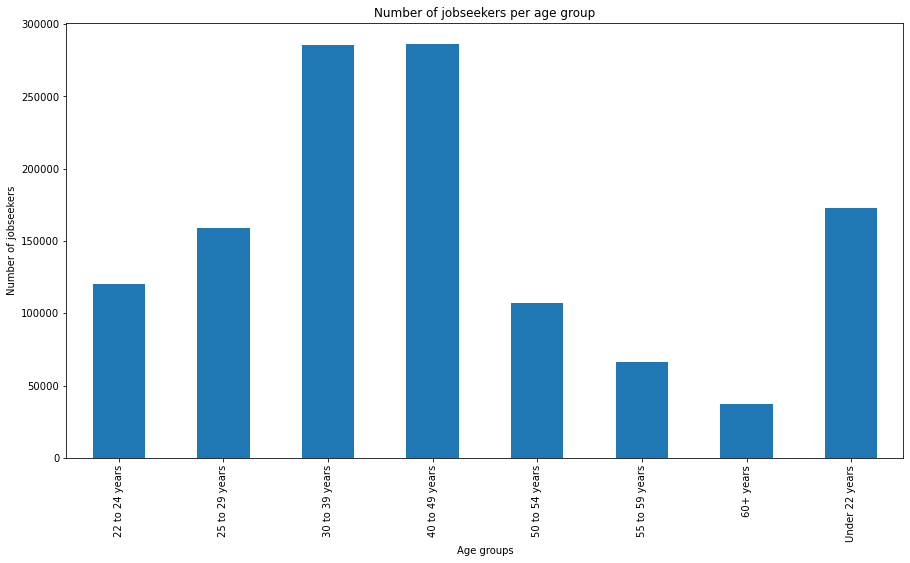

In [9]:
# Plotting number of jobseekers in each age group
age_groups.plot(kind="bar")
plt.title("Number of jobseekers per age group")
plt.xlabel("Age groups")
plt.ylabel("Number of jobseekers")

Plotting number of Jobseekers per age group.

Here I am trying to find the education levels of each jobseeker per age range. This can give us a better indication of whether education level is the reason why the age groups of 30 to 39 and 40 to 49 are so significantly high.

In [10]:
# Creating dataframe Age Group vs Education level
age_education = df[["Age group", "Education Level"]]
pd.set_option('display.max_rows', 30)
age_education.head(30)

,Age group,Education Level
0,50 to 54 years,Bachelor Degree or equivalent
1,50 to 54 years,Bachelor Degree or equivalent
2,50 to 54 years,Bachelor Degree or equivalent
3,50 to 54 years,Bachelor Degree or equivalent
4,25 to 29 years,Diploma or equivalent
5,25 to 29 years,Diploma or equivalent
6,25 to 29 years,Diploma or equivalent
7,25 to 29 years,Diploma or equivalent
8,25 to 29 years,Diploma or equivalent
9,25 to 29 years,Diploma or equivalent


In [11]:
# Creating and showing dataframe for age groups and number of jobseekers per education level.
age_education_count = df.groupby("Age group")["Education Level"].value_counts()
pd.set_option('display.max_rows', None)
age_education_df = pd.DataFrame(age_education_count)
age_education_df.rename(columns={ age_education_df.columns[0]: "No. of jobseekers" }, inplace = True)
age_education_df

No. of jobseekers
Age group      Education Level                                              
22 to 24 years Non-trade vocational education                          39170
               Year 10/11                                              32789
               Secondary schooling completed (Year 12/13)              24667
               Primary school or less than Year 10                     12410
               Diploma or equivalent                                    4035
               Bachelor Degree or equivalent                            3952
               Trades qualification                                     1730
               Graduate Certificate or equivalent                        566
               Did not go to school                                      514
               UKN                                                       208
               Post-graduate                                             188
               Graduate Diploma or equivalent                             98
               Special school or special support unit                     69
25 to 29 years Year 10/11                                              49172
               Non-trade vocational education                          45273
               Secondary schooling completed (Year 12/13)              26017
               Primary school or less than Year 10                     18618
               Diploma or equivalent                                    6544
               Bachelor Degree or equivalent                            5675
               Trades qualification                                     4870
               Graduate Certificate or equivalent                        950
               Did not go to school                                      687
               Post-graduate                                             634
               UKN                                                       183
               Graduate Diploma or equivalent                            166
               Special school or special support unit                    125
               Trade or TAFE qualification                                21
30 to 39 years Year 10/11                                              89907
               Non-trade vocational education                          70874
               Secondary schooling completed (Year 12/13)              41694
               Primary school or less than Year 10                     37076
               Trades qualification                                    14151
               Diploma or equivalent                                   13895
               Bachelor Degree or equivalent                           10303
               Did not go to school                                     2667
               Post-graduate                                            2144
               Graduate Certificate or equivalent                       1589
               Graduate Diploma or equivalent                            399
               UKN                                                       358
               Special school or special support unit                    139
               Trade or TAFE qualification                                64
               Ed Quals-Less than Year 10                                 21
               Ed Quals-Secondary Schooling Completed                     18
               Ed Quals-Year 10 Completed                                 17
               Ed Quals-Year 11 Completed                                 15
               Ed Quals-Trade/TAFE qualification                           7
               Diploma                                                     5
               Degree                                                      3
40 to 49 years Year 10/11                                              91207
               Non-trade vocational education                          57849
               Primary school or less than Year 10     

The data shows that there is a significant number of jobseekers with their highest level of education being Year 10/11 in both the age groups of 30-39 and 40-49, more so than any other age group, closely followed by non-trade vocational education and Year12/13 and primary school/less than year 10.

Conclusion:

- Having a higher level of education does help in keeping out of unemployment. 
- The results I have found are to be expected, as logically speaking, those with lower levels of education such as Year10/11 may require additional help to seek unemployment.
- Looking at the findings, it seems that expenditure could be directed to funding the education of jobseekers to help them develop additional skills that would allow them to transition to a relevant career. 